In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:

def memory_derivative(file):
    # Load the CSV file containing memory throughput data
    file_path = file
    data = pd.read_csv(file_path)
    
    # Ensure the relevant columns have no leading/trailing spaces
    data.columns = data.columns.str.strip()
    
    # Convert the 'Time Elapsed (s)' and 'total(MB/s)' columns to numeric values
    data['Time Elapsed (s)'] = pd.to_numeric(data['Time Elapsed (s)'], errors='coerce')
    data['total(MB/s)'] = pd.to_numeric(data['total(MB/s)'], errors='coerce')
    
    # Drop rows with NaN values (in case there are any after conversion)
    data = data.dropna(subset=['Time Elapsed (s)', 'total(MB/s)'])
    
    # Calculate the first derivative of total memory throughput with respect to time
    time = data['Time Elapsed (s)']
    total_throughput = data['total(MB/s)']
    
    # Calculate the first derivative using numpy's gradient function
    # This gives an approximation of the derivative (rate of change)
    derivative = np.gradient(total_throughput, time)
    
    # Plot the derivative of total memory throughput with respect to time
    plt.figure(figsize=(10, 6))
    plt.plot(time, derivative, label='d(memory throughput)/dt', color='b')
    
    # Add labels and title
    plt.xlabel('Time Elapsed (s)')
    plt.ylabel('Derivative of Total Memory Throughput (MB/s²)')
    plt.title('First Derivative of Total Memory Throughput Over Time')
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [19]:
data_dir = "./ecp_power_res/mem_throughput/max_uncore/"
benchmarks = ['UNet']

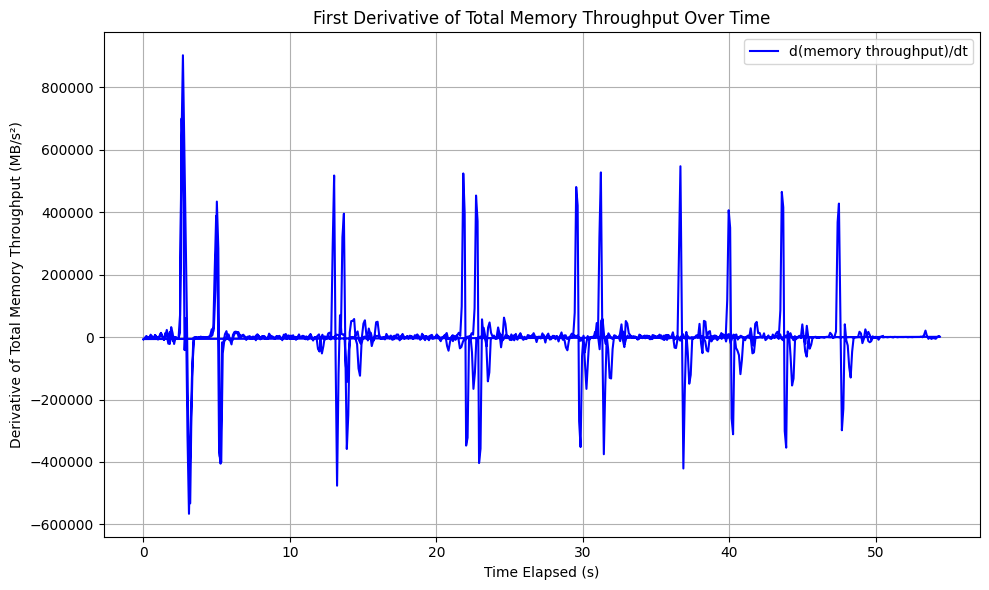

In [20]:
path = data_dir + "UNet" + ".csv"
memory_derivative(path)